## Spotify Music Recommendation System

## 1. Data Preprocessing

I started by collecting my data from Kaggle.

In [364]:
import pandas as pd
import numpy as np

In [365]:
path = 'data/spotify_data.csv'
data = pd.read_csv(path)

In [366]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [367]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [368]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [369]:
null_rows = data[data['artists'].isnull() | data['album_name'].isnull() | data['track_name'].isnull()]
null_rows.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [370]:
data.dropna(inplace=True)
# data.isnull().sum()
# data.info()

In [371]:
# data.head()

## 2. Feature Analysis (for Model)

In [372]:
data['track_genre'] = data['track_genre'].astype('category')
data['song_index'] = data.index

# data.head()
# data[data['artists']=='Gracie Abrams']

## 3. Model Implementation

In [373]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [374]:
# Choose the features that we wan't to use to evaluate song recommendations

features = ['danceability', 'energy', 'liveness', 'valence', 'tempo']
# features = ['popularity', 'danceability', 'energy', 'tempo', 'loudness', 'valence']

data_features = data[features]
# data_features.head()

In [375]:
## INVESTIGATION

# Print features for the first few songs
print(data_features.head(20))  # Adjust the number as needed


    danceability  energy  liveness  valence    tempo
0          0.676  0.4610    0.3580   0.7150   87.917
1          0.420  0.1660    0.1010   0.2670   77.489
2          0.438  0.3590    0.1170   0.1200   76.332
3          0.266  0.0596    0.1320   0.1430  181.740
4          0.618  0.4430    0.0829   0.1670  119.949
5          0.688  0.4810    0.1890   0.6660   98.017
6          0.407  0.1470    0.0913   0.0765  141.284
7          0.703  0.4440    0.0973   0.7120  150.960
8          0.625  0.4140    0.1510   0.6690  130.088
9          0.442  0.6320    0.0735   0.1960   78.899
10         0.627  0.3630    0.0928   0.3010   99.905
11         0.483  0.3030    0.1150   0.1390  133.406
12         0.489  0.3140    0.1130   0.6070  124.234
13         0.691  0.2340    0.1200   0.2090   87.103
14         0.755  0.7800    0.1210   0.3870  120.004
15         0.489  0.5610    0.1790   0.2380   83.457
16         0.706  0.1120    0.1250   0.4140  110.154
17         0.795  0.0841    0.0853   0.6090   

In [376]:
# Standardize the features (all of them use different scales so standardizing them makes it easier to compare and evaluate)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Initialize the k nearest neighbors model (clustering!)
knn_model = NearestNeighbors(n_neighbors=20, algorithm='auto')

# Fit the model to the data
knn_model.fit(data_scaled)


NearestNeighbors(n_neighbors=20)

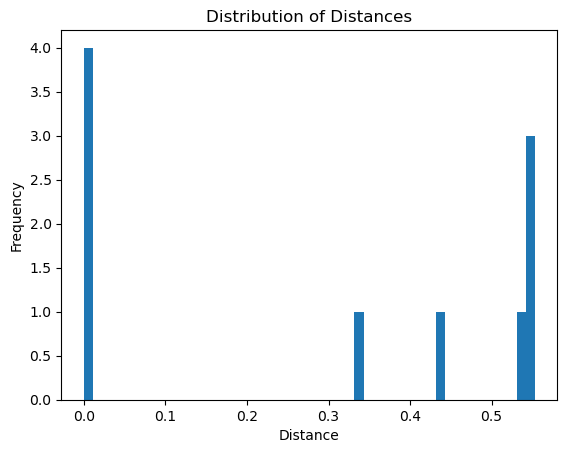

In [377]:
import matplotlib.pyplot as plt

plt.hist(distances.flatten(), bins=50)
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


In [378]:
def recommend_songs(song_index, n_neighbors=20):
    # Use the song_index directly for retrieving features
    distances, indices = knn_model.kneighbors(data_features.loc[song_index].values.reshape(1, -1), 
                                              n_neighbors=n_neighbors+1)
    # print("Distances:", distances)  
    # print("Indices:", indices)      

    
    # Retrieve the recommended songs using the indices obtained from KNN
    recommended_songs = data.loc[indices[0][1:]]  # Skip the first index because it's the input song itself
    recommended_songs = recommended_songs.drop_duplicates(subset=['track_name', 'album_name', 'artists'])
    
    return recommended_songs

# Example: Get 20 recommendations for the song with index 0
recommendations = recommend_songs(data['song_index'][0], n_neighbors=20)
# print(recommendations)


In [379]:
def find_song_index(data, song_name=None, artist_name=None):
    """
    Function to find the index of a song based on song name and/or artist name.
    Returns the first matching index found.
    """
    if song_name and artist_name:
        # Filter by both song name and artist name
        match = data[(data['track_name'].str.contains(song_name, case=False, na=False)) & 
                     (data['artists'].str.contains(artist_name, case=False, na=False))]
    elif song_name:
        # Filter by song name only
        match = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    elif artist_name:
        # Filter by artist name only
        match = data[data['artists'].str.contains(artist_name, case=False, na=False)]
    else:
        print("Please provide either a song name or an artist name.")
        return None
    
    if not match.empty:
        return match.index[0]  # Return the first matching index found
    else:
        print("No matching song or artist found.")
        return None


In [380]:
# Find the index of a song by name and/or artist
song_index = find_song_index(data, song_name="Hello", artist_name="Adele")
# song_index = find_song_index(data, artist_name="Avicii")
print(song_index)

# Use the song index to get recommendations
if song_index is not None:
    recommendations_df = recommend_songs(song_index, n_neighbors=20)
    recommendations.head(10)
    print("Recommended Songs:\n", recommendations_df[['track_name', 'artists', 'album_name']])



11011
Recommended Songs:
                                track_name                   artists  \
111907                  christi interlude                 FKA twigs   
1136                               Makoti             Hugh Masekela   
1144                               Makoti             Hugh Masekela   
1087                               Makoti             Hugh Masekela   
10195   Feel Like Jumpin - Krossbow Remix      Krafty Kuts;Krossbow   
94758                Can We Kiss Forever?      Kina;Adriana Proenza   
21289                          Se Ve Sola             Shamanes Crew   
26681                    Hip Hip Pooh Rah  Billboard Baby Lullabies   
54275                      My First Robot                  Freescha   
26638              Heffalumps and Woozles  Billboard Baby Lullabies   
59251              When There Was Nothing         Crows in the Rain   
73298                    Center to Center         Fritz Kalkbrenner   
98269                  Bu Şehrin Geceleri          

## 3. Model Accuracy

NameError: name 'recomendations_df' is not defined